<a href="https://colab.research.google.com/github/Anna-bel25/AV/blob/main/IA_detector_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detector de color

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import imutils

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture Photo';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        div.appendChild(video);
        document.body.appendChild(div);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Redimensiona la salida al tamaño del vídeo.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

photo_filename = take_photo()


<IPython.core.display.Javascript object>

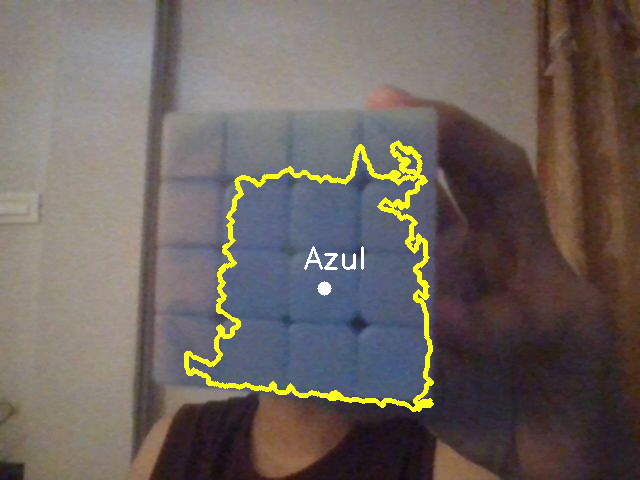

In [ ]:
# Leer la imagen capturada
image = cv2.imread(photo_filename)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# -- amarillo -- #
amarillo_osc = np.array([25, 70, 120])
amarillo_cla = np.array([30, 255, 255])

# -- rojo -- #
rojo_osc = np.array([0, 50, 120])
rojo_cla = np.array([10, 255, 255])

# -- verde -- #
verde_osc = np.array([40, 70, 80])
verde_cla = np.array([70, 255, 255])

# -- azul -- #
azul_osc = np.array([90, 60, 0])
azul_cla = np.array([121, 255, 255])

# -- máscara -- #
cara1 = cv2.inRange(hsv, amarillo_osc, amarillo_cla)
cara2 = cv2.inRange(hsv, rojo_osc, rojo_cla)
cara3 = cv2.inRange(hsv, verde_osc, verde_cla)
cara4 = cv2.inRange(hsv, azul_osc, azul_cla)

# -- contornos -- #
cnts1 = cv2.findContours(cara1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts1 = imutils.grab_contours(cnts1)
cnts2 = cv2.findContours(cara2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = imutils.grab_contours(cnts2)
cnts3 = cv2.findContours(cara3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts3 = imutils.grab_contours(cnts3)
cnts4 = cv2.findContours(cara4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts4 = imutils.grab_contours(cnts4)

# -- amarillo -- #
for c in cnts1:
    area1 = cv2.contourArea(c)
    if area1 > 5000:
        cv2.drawContours(image, [c], -1, (30, 255, 255), 3)
        M = cv2.moments(c)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.circle(image, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(image, 'Amarillo', (cx - 20, cy - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# -- rojo -- #
for c in cnts2:
    area2 = cv2.contourArea(c)
    if area2 > 5000:
        cv2.drawContours(image, [c], -1, (30, 255, 255), 3)
        M = cv2.moments(c)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.circle(image, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(image, 'Rojo', (cx - 20, cy - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# -- verde -- #
for c in cnts3:
    area3 = cv2.contourArea(c)
    if area3 > 5000:
        cv2.drawContours(image, [c], -1, (30, 255, 255), 3)
        M = cv2.moments(c)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.circle(image, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(image, 'Verde', (cx - 20, cy - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# -- azul -- #
for c in cnts4:
    area4 = cv2.contourArea(c)
    if area4 > 5000:
        cv2.drawContours(image, [c], -1, (30, 255, 255), 3)
        M = cv2.moments(c)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.circle(image, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(image, 'Azul', (cx - 20, cy - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Mostrar imagen procesada
cv2_imshow(image)
